<a href="https://colab.research.google.com/github/sarah-whitin/pytorch_tutorial/blob/main/basic_neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

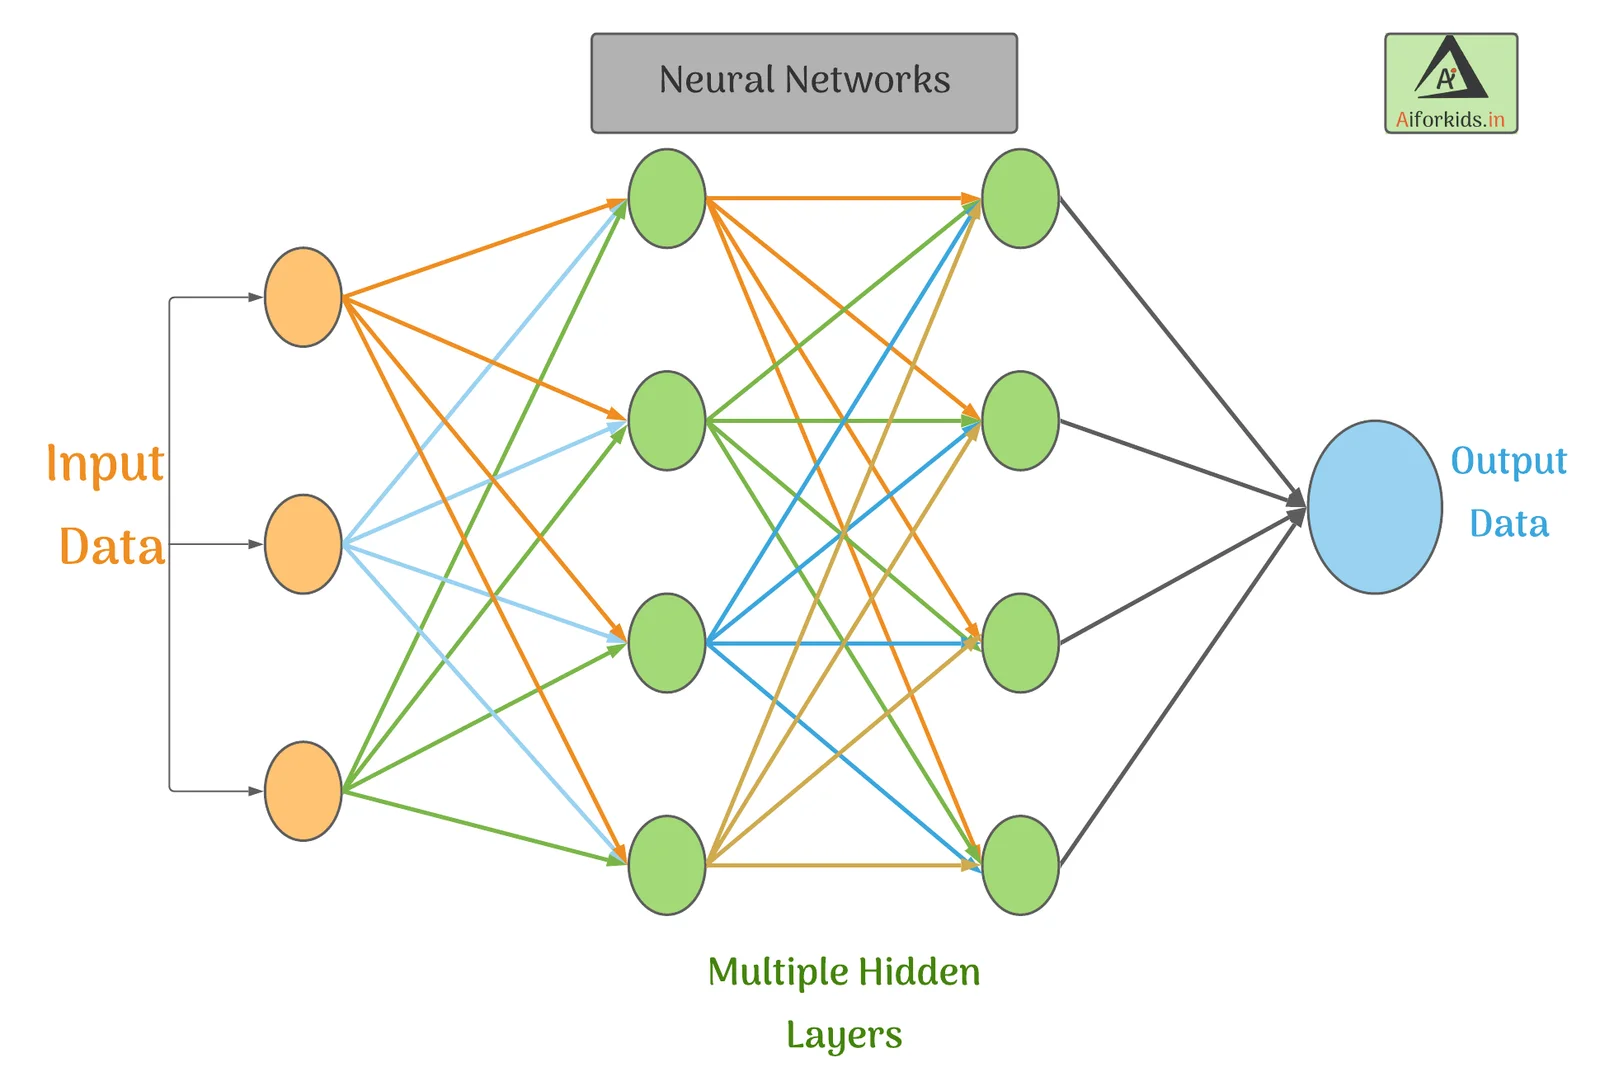

* can have many hidden layers
* may have many "dots" for the output layer
* using iris data sets

# Create Model

In [1]:
import torch
import torch.nn as nn # neural network package
import torch.nn.functional as F # allow us to move our data forward on our function

In [5]:
# Create a Model Class that inherits nn.Module
# using object oriented programming
class Model(nn.Module):
  # Input layer (4 features of the flower)
  # --> Hidden Layer1 (number of nueron) -- H2 (n)
  # --> output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features = 3):
    super().__init__() # instaniate our module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x)) # rectified linear unit -- if less than zero, call it zero
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [6]:
# create random seed
torch.manual_seed(41)

# create an instance of model
model = Model()

# Data Import

In [8]:
import pandas as pd # he has a series on pandas
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
ur1 = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
my_df = pd.read_csv(ur1)

In [10]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [14]:
# replacing string categories with floats
my_df["species"] = my_df["species"].replace("setosa", 0.0)
my_df["species"] = my_df["species"].replace("versicolor", 1.0)
my_df["species"] = my_df["species"].replace("virginica", 2.0)
my_df

/tmp/ipython-input-1522325698.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df["species"] = my_df["species"].replace("virginica", 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [19]:
# Train Test Split! Set X, Y
# x is feature, y is outcome
X = my_df.drop("species", axis = 1) # pandas
y = my_df["species"] # upper and lower convention
print(X)
print(y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: species, Length: 150, dtype: float64


In [20]:
X = X.values
y = y.values

# Train

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [26]:
# convert x to tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
print(X_train)
print(X_test)

tensor([[5.7000, 2.6000, 3.5000, 1.0000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [4.9000, 2.5000, 4.5000, 1.7000],
        [5.5000, 2.6000, 4.4000, 1.2000],
        [6.7000, 3.0000, 5.2000, 2.3000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [6.9000, 3.1000, 5.1000, 2.3000],
        [6.4000, 3.2000, 4.5000, 1.5000],
        [6.9000, 3.1000, 5.4000, 2.1000],
        [5.9000, 3.2000, 4.8000, 1.8000],
        [6.2000, 2.9000, 4.3000, 1.3000],
        [5.7000, 2.8000, 4.5000, 1.3000],
        [5.2000, 4.1000, 1.5000, 0.1000],
        [6.5000, 3.0000, 5.8000, 2.2000],
        [6.3000, 3.4000, 5.6000, 2.4000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [6.7000, 2.5000, 5.8000, 1.8000],
        [5.1000, 2.5000, 3.0000, 1.1000],
        [4.8000, 3.0000, 1.4000, 0.3000],
        [6.2000, 2.2000, 4.5000, 1.5000],
        [6.4000, 2.7000, 5.3000, 1.9000],
        [5.8000, 2.7000, 3.9000, 1.2000],
        [7.4000, 2.8000, 6.1000, 1.9000],
        [5.2000, 3.5000, 1.5000, 0

In [28]:
# Covert y labels to tensor long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)
print(y_train)
print(y_test)

tensor([1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 0,
        0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2,
        0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 1,
        2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2,
        0, 2, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2])
tensor([2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0,
        1, 1, 1, 1, 0, 1])


In [30]:
# Set the criterion of the model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Chose Adam Optimizer, lr = learning rate
# (if error doesnt go down after a bunch. of iteratiosn (epochs) might want to lower learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [32]:
print(model.parameters)

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>


In [34]:
# Tain our model
# Epochs? (one run thru all training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # get predictated results

  # Measure teh loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicated values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f"Epoch: {i} and loss: {loss}")

  # Do some back propagation: take the error rate of forward propagationi and feed it back
  # thru the netowrk to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.0096259117126465
Epoch: 20 and loss: 0.8157405853271484
Epoch: 30 and loss: 0.585706353187561
Epoch: 40 and loss: 0.3999636471271515
Epoch: 50 and loss: 0.26768800616264343
Epoch: 60 and loss: 0.17942361533641815
Epoch: 70 and loss: 0.12151690572500229
Epoch: 80 and loss: 0.0860118493437767
Epoch: 90 and loss: 0.06520850956439972


Text(0.5, 0, 'Epoch')

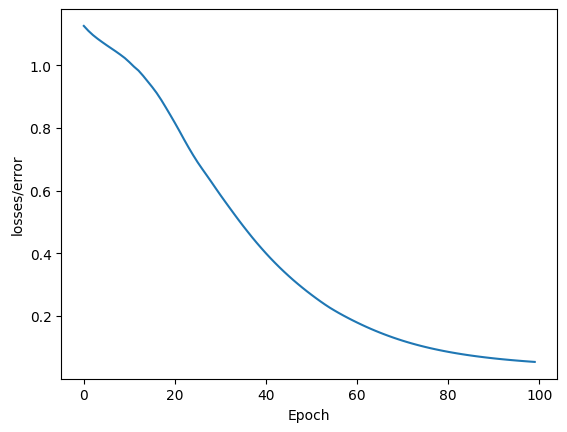

In [35]:
# Graph it out
plt.plot(range(epochs), losses)
plt.ylabel("losses/error")
plt.xlabel("Epoch")

# Evaluate Model

In [37]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad(): # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_Test are features from our test set, y_eval will be our predictions
  loss = criterion(y_eval, y_test) # Find loss/error

loss

tensor(0.1315)

This is not great - we'd want the loss to be closer to 0.065.
Let's see how our test did.

In [47]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # if y_test[i] == 0:
    #   x = "setosa"
    # elif y_test[i] == 1:
    #   x = "versicolor"
    # else:
    #   x = "virginica"

    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')
    # Highest value is the network's guess

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

    print(f"We got {correct} correct")

1.) tensor([-5.8760,  4.4628,  6.5124]) 	 2 	 2
We got 1 correct
2.) tensor([-7.5436,  4.1670,  9.7255]) 	 2 	 2
We got 2 correct
3.) tensor([-8.4504,  5.1271, 10.1987]) 	 2 	 2
We got 3 correct
4.) tensor([-4.3398,  5.6267,  2.5608]) 	 1 	 1
We got 4 correct
5.) tensor([-7.1825,  4.8754,  8.2992]) 	 2 	 2
We got 5 correct
6.) tensor([-3.3974,  5.3463,  1.2803]) 	 1 	 1
We got 6 correct
7.) tensor([-5.9231,  4.9822,  5.9997]) 	 2 	 2
We got 7 correct
8.) tensor([-4.2881,  5.7003,  2.3889]) 	 1 	 1
We got 8 correct
9.) tensor([-6.5356,  4.9257,  7.1260]) 	 2 	 2
We got 9 correct
10.) tensor([-8.0509,  4.4129, 10.3286]) 	 2 	 2
We got 10 correct
11.) tensor([-5.6762,  4.9500,  5.6215]) 	 2 	 2
We got 11 correct
12.) tensor([ 4.5662, -2.2476, -2.8911]) 	 0 	 0
We got 12 correct
13.) tensor([ 4.2571, -1.9967, -2.7330]) 	 0 	 0
We got 13 correct
14.) tensor([-2.1108,  4.0515,  0.5799]) 	 1 	 1
We got 14 correct
15.) tensor([ 3.4575, -1.2098, -2.3514]) 	 0 	 0
We got 15 correct
16.) tensor([

Might get diff numbers if diff seeds